In [1]:
import json
from datetime import datetime
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

from gbfs.services import SystemDiscoveryService

# %matplotlib widget
%matplotlib inline

In [2]:
ds = SystemDiscoveryService()

In [3]:
#  [x.get('System ID') for x in ds.systems if 'WA' in x.get('Location')]

In [4]:
ds.get_system_by_id('lime_seattle')

{'Country Code': 'US',
 'Name': 'Lime Seattle',
 'Location': 'Seattle, WA',
 'System ID': 'lime_seattle',
 'URL': 'https://www.li.me/',
 'Auto-Discovery URL': 'https://data.lime.bike/api/partners/v2/gbfs/seattle/gbfs.json',
 'Supported Versions': '2.2',
 'Authentication Info': ''}

In [5]:
client = ds.instantiate_client('lime_seattle')
client.feed_names

['system_information',
 'station_information',
 'station_status',
 'free_bike_status',
 'vehicle_types']

In [6]:
client.request_feed('vehicle_types')

{'last_updated': datetime.datetime(2025, 2, 19, 6, 43, 19),
 'ttl': 86400,
 'version': '2.2',
 'data': {'vehicle_types': [{'vehicle_type_id': '1',
    'form_factor': 'scooter',
    'propulsion_type': 'electric',
    'max_range_meters': 24140},
   {'vehicle_type_id': '2',
    'form_factor': 'scooter',
    'propulsion_type': 'electric',
    'max_range_meters': 40233},
   {'vehicle_type_id': '3',
    'form_factor': 'bicycle',
    'propulsion_type': 'electric_assist',
    'max_range_meters': 85000},
   {'vehicle_type_id': '4',
    'form_factor': 'bicycle',
    'propulsion_type': 'human'}]}}

In [7]:
time_of_system_query = datetime.now()
system_status = client.request_feed('free_bike_status')
system_status["data"]["bikes"][0]

{'bike_id': 'a321ba75-dca3-4f00-9fc8-869c8cb6fc60',
 'lat': 47.659585,
 'lon': -122.313141,
 'is_reserved': False,
 'is_disabled': False,
 'current_range_meters': 7510,
 'vehicle_type_id': '2',
 'last_reported': 1739947405,
 'vehicle_type': 'scooter'}

In [8]:
output_filename_formatted = f"data/bikeshare_system_status_{time_of_system_query.strftime('%Y-%m-%d_%H-%M-%S')}.json"

with open(output_filename_formatted, "w") as output_file:
    json.dump(system_status["data"]["bikes"], output_file)

In [9]:
bikeshare_df = pd.read_json(output_filename_formatted)
bikeshare_df.head()

bike_id        lat         lon  is_reserved  \
0  a321ba75-dca3-4f00-9fc8-869c8cb6fc60  47.659585 -122.313141        False   
1  8a8dc526-5d64-4d1a-a779-c577aeabfc66  47.658743 -122.313142        False   
2  eb8e5a20-a62c-4015-bd1c-b89feeb4d38e  47.661292 -122.313150        False   
3  e54169b2-9216-499f-b803-0c0a1b659c6a  47.665363 -122.313155        False   
4  97fda676-1fa1-4416-99c6-beb53cbd5627  47.664583 -122.313179        False   

   is_disabled  current_range_meters  vehicle_type_id  last_reported  \
0        False                  7510                2     1739947405   
1        False                 36057                2     1739947405   
2        False                 37698                2     1739947405   
3        False                 20409                2     1739947405   
4        False                 27808                2     1739947405   

  vehicle_type  
0      scooter  
1      scooter  
2      scooter  
3      scooter  
4      scooter

In [10]:
geometry = gpd.points_from_xy(bikeshare_df.lon, bikeshare_df.lat)
bikeshare_gdf = gpd.GeoDataFrame(bikeshare_df, geometry=geometry)
bikeshare_gdf.set_crs("EPSG:4326", inplace=True)
bikeshare_gdf.to_crs("EPSG:32610", inplace=True)
bikeshare_gdf.head()

bike_id        lat         lon  is_reserved  \
0  a321ba75-dca3-4f00-9fc8-869c8cb6fc60  47.659585 -122.313141        False   
1  8a8dc526-5d64-4d1a-a779-c577aeabfc66  47.658743 -122.313142        False   
2  eb8e5a20-a62c-4015-bd1c-b89feeb4d38e  47.661292 -122.313150        False   
3  e54169b2-9216-499f-b803-0c0a1b659c6a  47.665363 -122.313155        False   
4  97fda676-1fa1-4416-99c6-beb53cbd5627  47.664583 -122.313179        False   

   is_disabled  current_range_meters  vehicle_type_id  last_reported  \
0        False                  7510                2     1739947405   
1        False                 36057                2     1739947405   
2        False                 37698                2     1739947405   
3        False                 20409                2     1739947405   
4        False                 27808                2     1739947405   

  vehicle_type                        geometry  
0      scooter  POINT (551572.637 5278694.135)  
1      scooter  POINT (551573.391 5278600.556)  
2      scooter   POINT (551570.28 5278883.843)  
3      scooter  POINT (551565.895 5279336.284)  
4      scooter   POINT (551564.861 5279249.58)

In [11]:
# ctx.providers.OpenStreetMap

In [12]:
seattle_city = "2016_seattle_city"
seattle_cra = "2016_seattle_cra"
seattle_neighborhoods = "2016_seattle_neighborhoods"
seattle_pumas = "2016_seattle_pumas"

seattle_geojson_url = f'https://raw.githubusercontent.com/seattleflu/seattle-geojson/master/seattle_geojsons/{seattle_neighborhoods}.geojson'

seattle_gdf = gpd.read_file(
    seattle_geojson_url,
    engine='pyogrio'
)
seattle_gdf.to_crs("EPSG:32610", inplace=True)
seattle_gdf.head()

STATEFP COUNTYF TRACTCE               AFFGEOI        GEOID  \
0  1400000US53033003000     033  003000  1400000US53033003000  53033003000   
1  1400000US53033005801     033  005801  1400000US53033005801  53033005801   
2  1400000US53033007600     033  007600  1400000US53033007600  53033007600   
3  1400000US53033000200     033  000200  1400000US53033000200  53033000200   
4  1400000US53033009300     033  009300  1400000US53033009300  53033009300   

    NAME LSAD    ALAND  AWATER  rowID                        CRA_NAM  \
0     30   CT  1493249       0      1               Whittier Heights   
1  58.01   CT  1814668  264894      2                       Interbay   
2     76   CT   571879       0      3                    Miller Park   
3      2   CT  3286278       0      4  Olympic Hills/Victory Heights   
4     93   CT  9429073  719985      5                  Duwamish/SODO   

               NEIGHBO  PUMA5CE  \
0              Ballard    11601   
1  Magnolia/Queen Anne    11603   
2                 East    11604   
3                North    11602   
4     Greater Duwamish    11605   

                                            geometry  
0  MULTIPOLYGON (((547579.459 5280078.567, 547582...  
1  MULTIPOLYGON (((548725.85 5274777.605, 549014....  
2  MULTIPOLYGON (((553695.251 5277372.334, 555808...  
3  MULTIPOLYGON (((553198.418 5283732.444, 553215...  
4  MULTIPOLYGON (((554320.64 5264487.451, 554340....

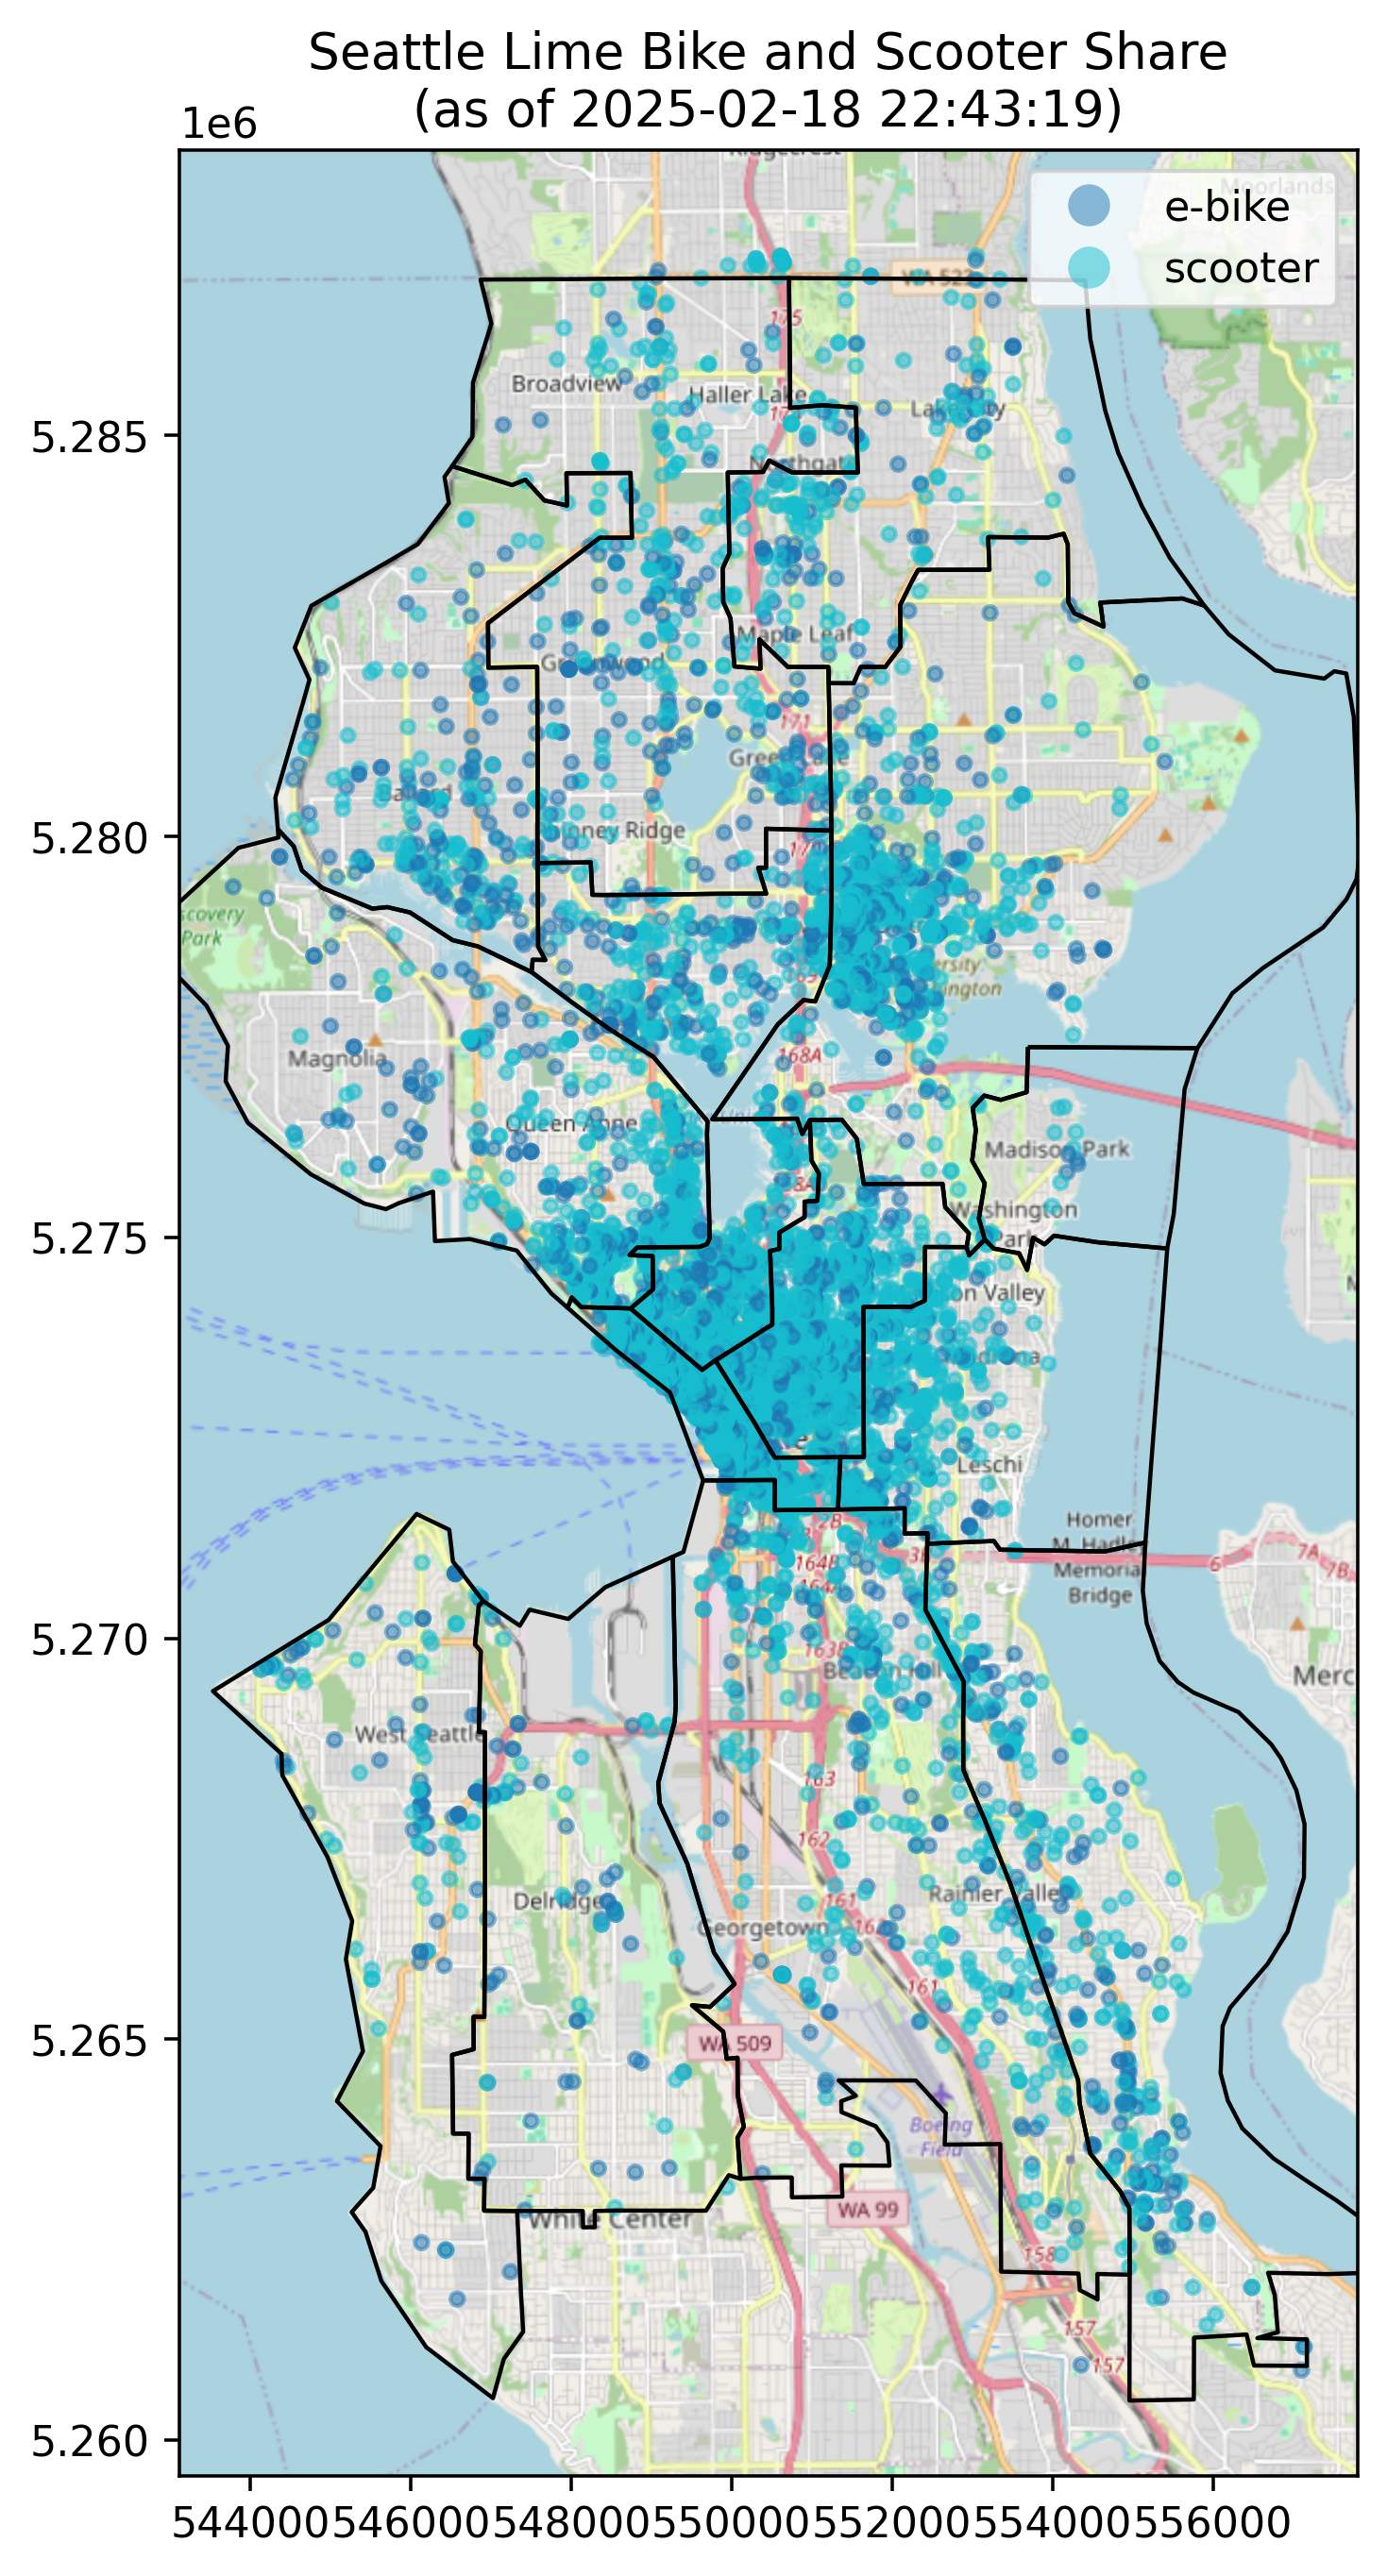

In [13]:
fig = plt.figure(figsize=(10, 10), dpi=320)
ax = fig.add_subplot(111)

bikeshare_gdf.plot(ax=ax, markersize=10, column="vehicle_type", legend=True, alpha=0.5)
ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.OpenStreetMap.Mapnik, attribution=False)
# ctx.add_basemap(ax, crs=seattle_gdf.crs, source=ctx.providers.CartoDB.Positron, attribution=False)
seattle_gdf.plot(ax=ax, facecolor="None", edgecolor='black')

ax.set_title(f"Seattle Lime Bike and Scooter Share\n(as of {time_of_system_query.strftime('%Y-%m-%d %H:%M:%S')})")
plt.savefig(f"visuals/seattle_lime_bikeshare_{time_of_system_query.strftime('%Y-%m-%d_%H-%M-%S')}.png", dpi=320)
plt.show()